<a target="_blank" href="https://colab.research.google.com/github/butler-julie/DataScienceForPhysicists2025/blob/main/08_DatabasesAndAPIs/DatabasesAndAPIs.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Database and APIs: accessing materials data online

Author: Cormac Toher (University of Texas at Dallas)

Date Created: March 6, 2025

Last Modified: March 16, 2025

Created for the *Short Course on Data Science for Physicists* at the 2025 Global Physics Summit.

* Machine-learning benefits from large quantities of data for training and testing

* Materials data is now available online through websites and programmatically accessible APIs

* Available data includes both experimental (relatively scarce and often requiring license fees) and computational data (relatively plentiful and freely available)

* Computational materials databases include:
>* AFLOW: https://aflow.org; [AFLOW reference](https://www.sciencedirect.com/science/article/abs/pii/S0927025622005195)
>* Materials Project: https://materialsproject.org; [Materials Project reference](https://pubs.aip.org/aip/apm/article/1/1/011002/119685/Commentary-The-Materials-Project-A-materials)
>* NOMAD: https://nomad-lab.eu; [NOMAD reference](https://joss.theoj.org/papers/10.21105/joss.05388)
>* OQMD: https://oqmd.org; [OQMD reference](https://link.springer.com/article/10.1007/s11837-013-0755-4)
>* Materials Cloud: https://materialscloud.org; [Materials Cloud reference](https://www.nature.com/articles/s41597-020-00637-5)

* Databases can be accessed programmatically using REST-APIs

REST-API: Representational State Transfer Application Programming Interface


* In response to a client request, the API transfers a representation of the current state (e.g. current version of a section of a database) to the client

* Commonly used methods: GET (retrieve data from server), POST (post data to server)

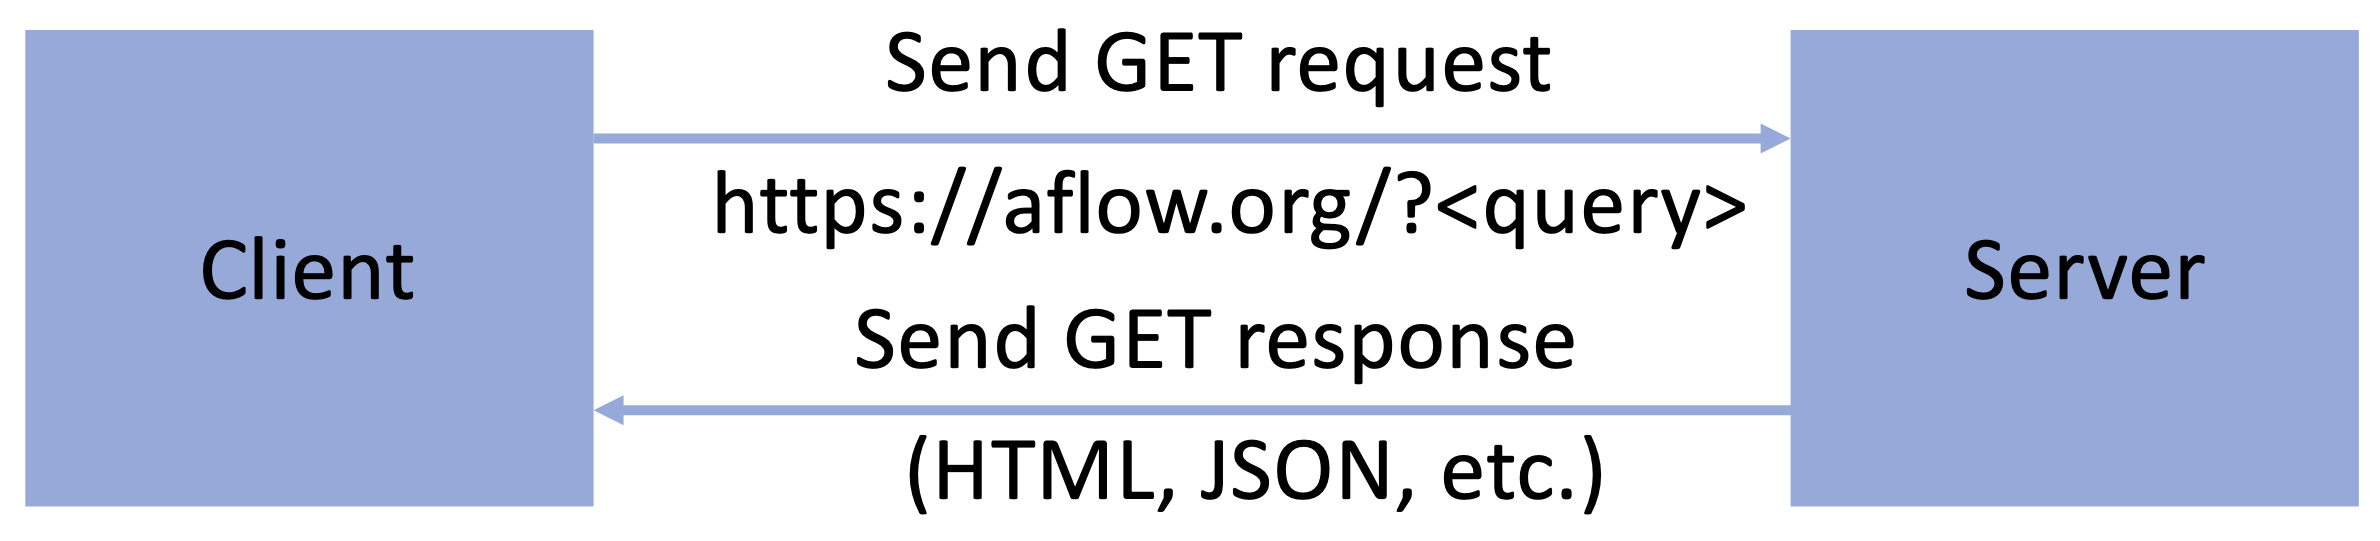

GET request is submitted in the form of a URI (Uniform Resource Identifier)

* URI has the following format:

\<scheme\>://\<authority>/\<path>?\<query>#\<fragment>

# AFLUX Search API for AFLOW database

AFLUX Search API can be used to programmatically retrieve data from the AFLOW database.

* AFLUX URI has the format: https://aflow.org/API/aflux/?<matchbook\>,\<directives>

* Matchbook: materials keywords with arguments

* Directives: formatting instructions with arguments

* AFLUX supports several logical operators; operator scope can be inter-property and/or intra-property

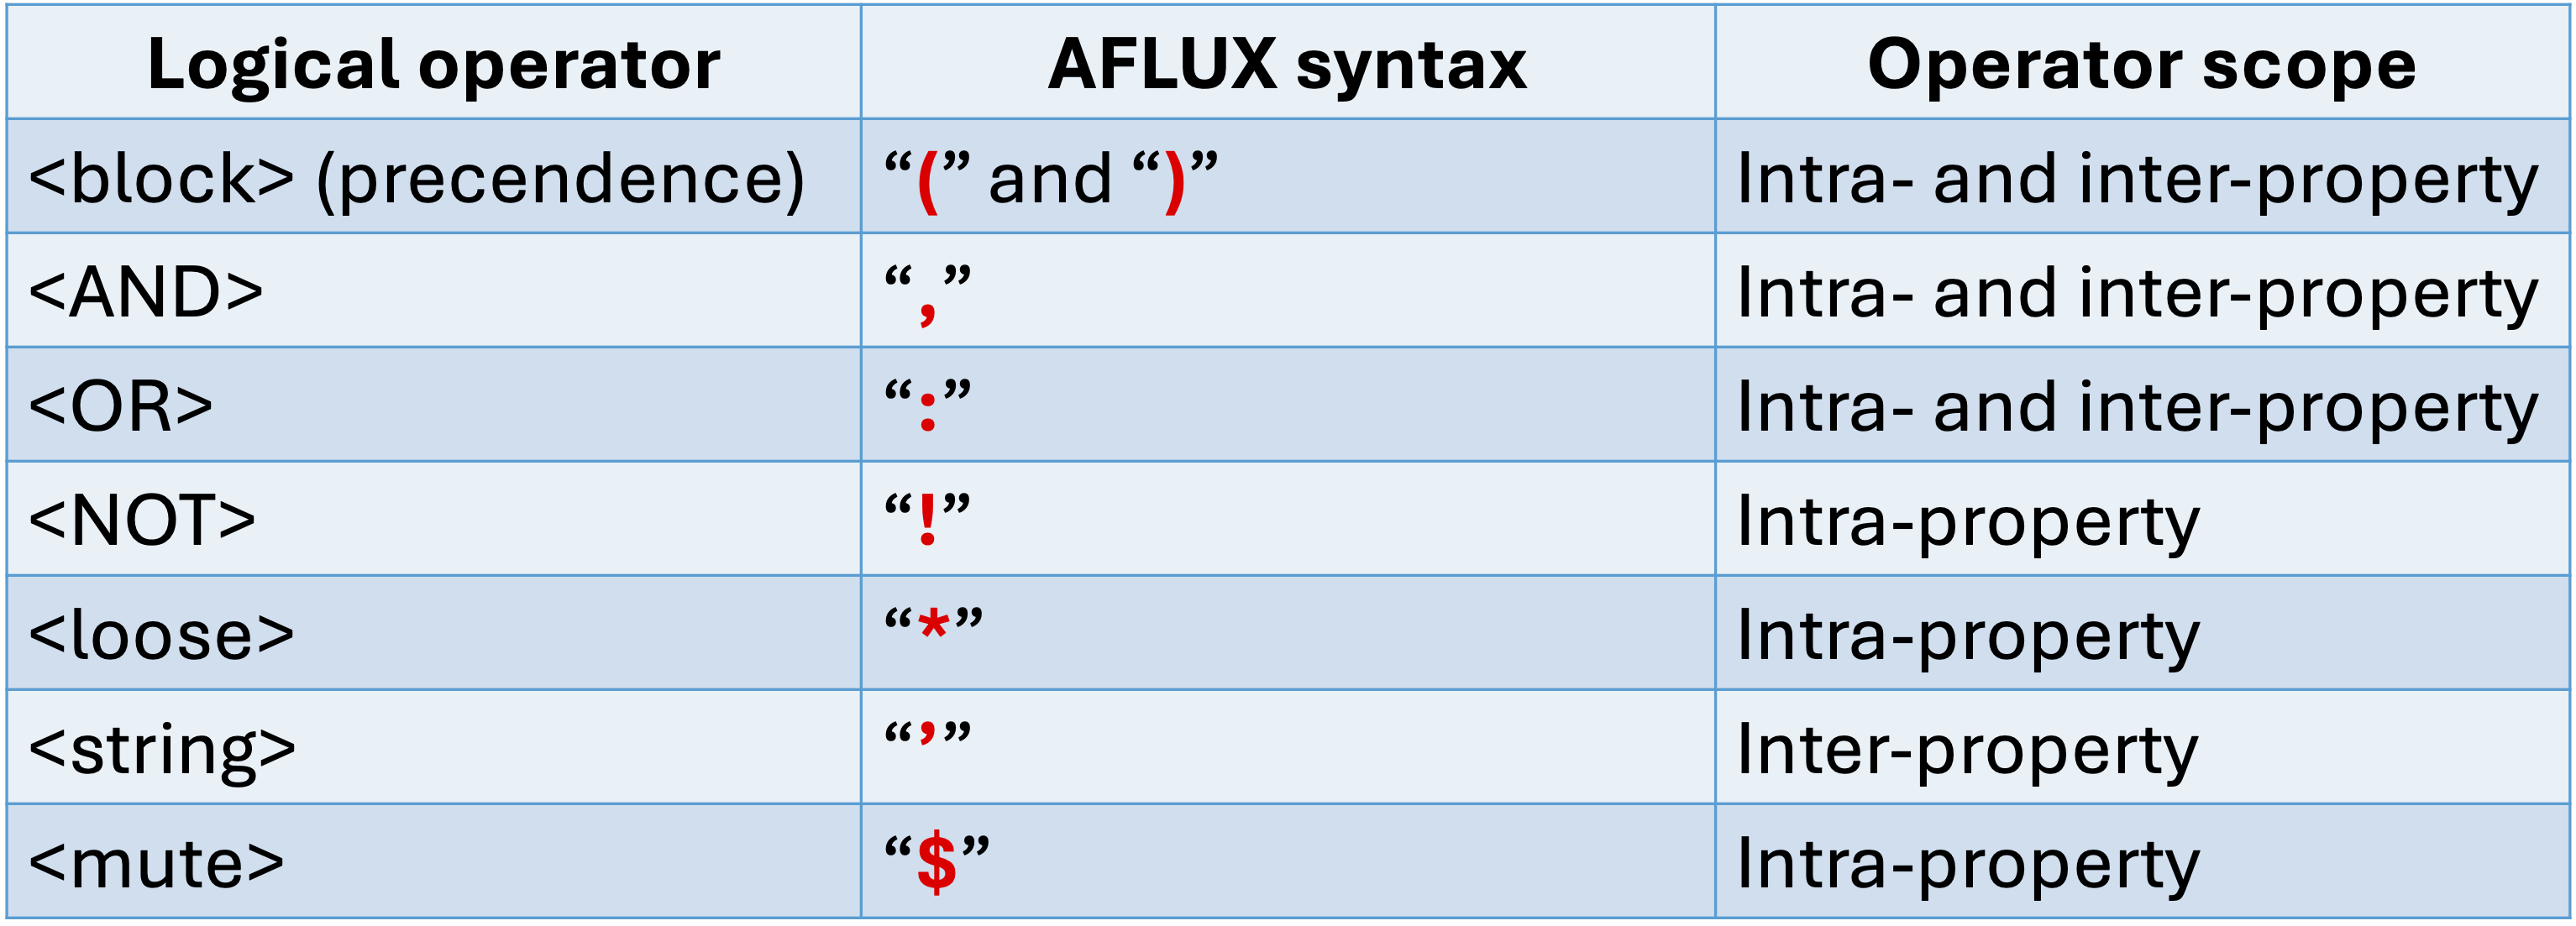


Common AFLUX keywords:

* species: chemical species (usually element symbols)
* nspecies: number of different species in compound
* Egap: electronic band gap
* spacegroup_relax: Space group of relaxed structure
* Pearson_symbol_relax: Pearson symbol of relaxed structure
* aflow_prototype_label_relax: AFLOW prototype label (structure type) of relaxed structure
* auid: AFLOW unique identifier
* compound: chemical formula (elements listed alphabetically)
* aurl: AFLOW URL (link to full record for entry)

For more information, see:

* [AFLOW REST-API](https://www.sciencedirect.com/science/article/pii/S0927025614003322)
* [AFLUX search-API](https://www.sciencedirect.com/science/article/abs/pii/S092702561730229X)
* [AFLUX schema, including full list of keywords](https://aflow.org/API/aflux/?schema)

Programmatically searching for data using AFLUX API: search for NaCl or KCl with an electronic band gap greater than 5eV

* Matchbook: species((Na:K),Cl),nspecies(2),Egap(5*)

* Directives (return all entries and mute paging information): $paging(0)

Import libraries to interpret JSON objects and query URLs

In [2]:
import json
from urllib.request import urlopen

AFLOW server and AFLUX API

Note: if you have issues accessing this directly, you can try replacing "aflow.org" with "aflowlib.duke.edu"

In [3]:
AFLOW_SERVER="https://aflow.org"
AFLUX_API="/API/aflux/?"

Generate query: search for NaCl and KCl (Na or K and Cl)

Print query (can be opened in browser window)

Print response

In [4]:
MATCHBOOK="species((Na:K),Cl),nspecies(2),Egap(5*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

# Print URL query
print(AFLOW_SERVER+AFLUX_API+SUMMONS)

# Submit query and convert response into list of python dictionaries
response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

https://aflow.org/API/aflux/?species((Na:K),Cl),nspecies(2),Egap(5*),$paging(0)
[{'compound': 'Cl1K1', 'auid': 'aflow:04b2e3ac1bd9b49b', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1K1_ICSD_240523', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'K'], 'nspecies': 2, 'Egap': 5.0427}, {'compound': 'Cl1K1', 'auid': 'aflow:10ecfa7c5168b66a', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1K1_ICSD_240515', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'K'], 'nspecies': 2, 'Egap': 5.0482}, {'compound': 'Cl1K1', 'auid': 'aflow:128b9accb20279b5', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1K1_ICSD_240527', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'K'], 'nspecies': 2, 'Egap': 5.0422}, {'compound': 'Cl1K1', 'auid': 'aflow:165ce9613a0efc6f', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1K1_ICSD_53841', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'K'], 

Parse JSON response: print chemical formula and electronic band gap

In [5]:
for datum in response:
    print ("{}, {}".format(datum['compound'], datum['Egap']))

Cl1K1, 5.0427
Cl1K1, 5.0482
Cl1K1, 5.0422
Cl1K1, 5.0553
Cl1K1, 5.0545
Cl1K1, 5.0487
Cl1K1, 5.0534
Cl1K1, 5.0547
Cl1K1, 5.0529
Cl1K1, 5.0439
Cl1K1, 5.0533
Cl1K1, 5.0365
Cl1K1, 5.0387
Cl1K1, 5.0325
Cl1K1, 5.0395
Cl1K1, 5.0321
Cl1K1, 5.0574
Cl1K1, 5.0396
Cl1K1, 5.0588
Cl1K1, 5.039
Cl1K1, 5.0406
Cl1K1, 5.0385
Cl1K1, 5.0423
Cl1K1, 5.0526
Cl1K1, 5.0486
Cl1K1, 5.0543
Cl1K1, 5.0398
Cl1K1, 5.0547
Cl1K1, 5.054
Cl1K1, 5.0322
Cl1K1, 5.0385
Cl1K1, 5.0486
Cl1K1, 5.0423
Cl1K1, 5.0538
Cl1K1, 5.0327
Cl1K1, 5.0418
Cl1K1, 5.0392
Cl1K1, 5.0439
Cl1Na1, 5.0564
Cl1Na1, 5.0561
Cl1Na1, 5.0564
Cl1Na1, 5.0394
Cl1Na1, 5.0506
Cl1Na1, 5.0504
Cl1Na1, 5.0544
Cl1Na1, 5.0535
Cl1Na1, 5.0476
Cl1Na1, 5.0363
Cl1Na1, 5.0498
Cl1Na1, 5.0569
Cl1Na1, 5.0569
Cl1Na1, 5.0622
Cl1Na1, 5.0569
Cl1Na1, 5.0536
Cl1Na1, 5.0514
Cl1Na1, 5.0511
Cl1Na1, 5.0535
Cl1Na1, 5.0416
Cl1Na1, 5.0394
Cl1Na1, 5.0568
Cl1Na1, 5.0569
Cl1Na1, 5.0577
Cl1Na1, 5.0572


Search for materials containing C, Si, Ge or Sn but not Pb: species((C:Si:Ge:Sn),!Pb)

In [6]:
# (C or Si or Ge or Sn) and Pb
MATCHBOOK="species((C:Si:Ge:Sn),!Pb)"
DIRECTIVES="$paging(1,10)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

print(AFLOW_SERVER+AFLUX_API+SUMMONS)

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

https://aflow.org/API/aflux/?species((C:Si:Ge:Sn),!Pb),$paging(1,10)
[{'compound': 'Ag1Al1Au1Sn1', 'auid': 'aflow:4389c382c27f3f50', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB4_RAW/AgAlAuSn:PAW_PBE/ABCD_cF16_216_c_d_b_a.ABCD', 'spacegroup_relax': 216, 'Pearson_symbol_relax': 'cF16', 'species': ['Ag', 'Al', 'Au', 'Sn']}, {'compound': 'Ag1Al1Au1Sn1', 'auid': 'aflow:7d3a5c148a5829a4', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB4_RAW/AgAlAuSn:PAW_PBE/ABCD_cF16_216_c_d_b_a.BCAD', 'spacegroup_relax': 216, 'Pearson_symbol_relax': 'cF16', 'species': ['Ag', 'Al', 'Au', 'Sn']}, {'compound': 'Ag1Al1Au1Sn1', 'auid': 'aflow:8691c6feed2a92ba', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB4_RAW/AgAlAuSn:PAW_PBE/ABCD_cF16_216_c_d_b_a.CABD', 'spacegroup_relax': 216, 'Pearson_symbol_relax': 'cF16', 'species': ['Ag', 'Al', 'Au', 'Sn']}, {'compound': 'Ag1Al1Ba1Sn1', 'auid': 'aflow:9e6dfd0dda0fe0a2', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB4_RAW/AgAlBa_svSn:PAW_PBE/ABCD_cF16_216_c_d_b_a.ABCD', 'spacegroup_relax': 21

## Pagination in AFLUX

Paging directive: control page number and number of entries per page: useful to limit amount of data returned at once to avoid overloading browser/computer

* “Page” is set of data returned per request; “paging(0)” returns all data

* Paging takes two arguments: first is page number “n”, second is number of entries per page “m”: paging(n,m)

* Example: return first page with 10 entries per page: paging(1,10)

* Negative page number reverses sort order: paging(-1,10)



Paging: print first page of 10 entries per page

In [7]:
MATCHBOOK="species((Na:K),Cl),nspecies(2),Egap(5*)"
# paging directive: first page of 10 entries
DIRECTIVES="$paging(2,20)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
for datum in response:
    print ("{}, {}".format(datum['compound'], datum['Egap']))

Cl1K1, 5.0406
Cl1K1, 5.0385
Cl1K1, 5.0423
Cl1K1, 5.0526
Cl1K1, 5.0486
Cl1K1, 5.0543
Cl1K1, 5.0398
Cl1K1, 5.0547
Cl1K1, 5.054
Cl1K1, 5.0322
Cl1K1, 5.0385
Cl1K1, 5.0486
Cl1K1, 5.0423
Cl1K1, 5.0538
Cl1K1, 5.0327
Cl1K1, 5.0418
Cl1K1, 5.0392
Cl1K1, 5.0439
Cl1Na1, 5.0564
Cl1Na1, 5.0561


## AFLUX: search by structure type

Prototype label: \<anonymous composition>\_\<Pearson symbol>\_\<space group number>\_\<Wyckoff positions>

* Cubic perovskite: ABC3_cP5_221_a_b_c
* Rocksalt: AB_cF8_225_a_b
* Zincblende: AB_cF8_216_a_b

For more information see AFLOW-Xtalfinder: https://www.nature.com/articles/s41524-020-00483-4

Search for NaCl in rocksalt structure: prototype label is AB_cF8_225_a_b

In [8]:
MATCHBOOK="species(Na,Cl),nspecies(2),aflow_prototype_label_relax(AB_cF8_225_a_b)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

[{'compound': 'Cl1Na1', 'auid': 'aflow:39ab5e62afdb5ac0', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1Na1_ICSD_622369', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'Na'], 'nspecies': 2, 'aflow_prototype_label_relax': 'AB_cF8_225_a_b'}, {'compound': 'Cl1Na1', 'auid': 'aflow:4f19021768a3118a', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1Na1_ICSD_41411', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'Na'], 'nspecies': 2, 'aflow_prototype_label_relax': 'AB_cF8_225_a_b'}, {'compound': 'Cl1Na1', 'auid': 'aflow:9017f9c64ead22ab', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1Na1_ICSD_240603', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Cl', 'Na'], 'nspecies': 2, 'aflow_prototype_label_relax': 'AB_cF8_225_a_b'}, {'compound': 'Cl1Na1', 'auid': 'aflow:a5755554aaf5d10e', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1Na1_ICSD_655785', 'spacegroup_relax': 225, 'Pearson_symbol_relax': '

Search for lead-free halide perovskites with band-gap greater than 3eV

Perovskite label: ABC3_cP5_221_a_b_c

In [10]:
MATCHBOOK="species((F:Cl:Br:I),!Pb),nspecies(3),aflow_prototype_label_relax(ABC3_cP5_221_a_b_c),Egap(3*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

[{'compound': 'Ag1Be1F3', 'auid': 'aflow:aa197e3461543939', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgBe_svF/T0009.ABC:LDAU2', 'spacegroup_relax': 221, 'Pearson_symbol_relax': 'cP5', 'species': ['Ag', 'Be', 'F'], 'nspecies': 3, 'aflow_prototype_label_relax': 'ABC3_cP5_221_a_b_c', 'Egap': 3.8336}, {'compound': 'Ag1Be1F3', 'auid': 'aflow:aa197e3461543939', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgBe_svF/T0009.ABC:LDAU2', 'spacegroup_relax': 221, 'Pearson_symbol_relax': 'cP5', 'species': ['Ag', 'Be', 'F'], 'nspecies': 3, 'aflow_prototype_label_relax': 'ABC3_cP5_221_a_b_c', 'Egap': 3.8336}]


Search for lead-free halide perovskites with band-gap greater than 3eV: use "Halogens" variable to search for all Halogens

In [11]:
MATCHBOOK="species(Halogens,!Pb),nspecies(3),aflow_prototype_label_relax(ABC3_cP5_221_a_b_c),Egap(3*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

[{'compound': 'Ag1Be1F3', 'auid': 'aflow:aa197e3461543939', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgBe_svF/T0009.ABC:LDAU2', 'spacegroup_relax': 221, 'Pearson_symbol_relax': 'cP5', 'species': ['Ag', 'Be', 'F'], 'nspecies': 3, 'aflow_prototype_label_relax': 'ABC3_cP5_221_a_b_c', 'Egap': 3.8336}, {'compound': 'Ag1Be1F3', 'auid': 'aflow:aa197e3461543939', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgBe_svF/T0009.ABC:LDAU2', 'spacegroup_relax': 221, 'Pearson_symbol_relax': 'cP5', 'species': ['Ag', 'Be', 'F'], 'nspecies': 3, 'aflow_prototype_label_relax': 'ABC3_cP5_221_a_b_c', 'Egap': 3.8336}]


Use prototype label to remove duplicate entries to clean data

First download data for different compositions in the Si-C system

In [12]:
MATCHBOOK="species(Si,C),nspecies(2),Egap(*),aflow_prototype_label_relax"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(len(response))
# Print chemical formula, band gap and prototype label
for datum in response:
    print ("{}, {}, {}".format(datum['compound'], datum['Egap'], datum['aflow_prototype_label_relax']))

44
C6Si6, 2.0219, AB_hP12_186_a2b_a2b
C1Si1, 0, AB_cF8_225_b_a
C4Si4, 2.2233, AB_hP8_186_ab_ab
C2Si2, 2.2963, AB_hP4_186_b_b
C21Si21, 1.6254, AB_hP42_156_7a7b7c_7a7b7c
C1Si1, 1.3709, AB_cF8_216_c_a
C14Si14, 1.8119, AB_hP28_156_5a5b4c_5a5b4c
C1Si1, 1.3706, AB_cF8_216_c_a
C6Si6, 2.0177, AB_hP12_186_a2b_a2b
C6Si6, 2.0173, AB_hP12_186_a2b_a2b
C6Si6, 2.0208, AB_hP12_186_a2b_a2b
C1Si1, 1.3705, AB_cF8_216_c_a
C1Si1, 1.3707, AB_cF8_216_a_c
C10Si10, 2.0048, AB_hP20_156_4a3b3c_4a3b3c
C2Si2, 2.3046, AB_hP4_186_b_b
C1Si1, 1.3705, AB_cF8_216_a_c
C4Si2, 0, A2B_tP6_131_i_e
C2Si2, 2.2984, AB_hP4_186_b_b
C6Si6, 2.0174, AB_hP12_186_a2b_a2b
C8Si4, 0, A2B_cP12_205_c_a
C27Si27, 1.9683, AB_hP54_156_9a9b9c_9a9b9c
C8Si8, 1.776, AB_hP16_186_a3b_a3b
C7Si7, 1.8559, AB_hR14_160_7a_7a
C1Si1, 1.3705, AB_cF8_216_a_c
C2Si2, 2.3044, AB_hP4_186_b_b
C7Si7, 1.8546, AB_hR14_160_7a_7a
C4Si4, 2.2249, AB_hP8_186_ab_ab
C6Si6, 2.0174, AB_hP12_186_a2b_a2b
C5Si5, 1.7525, AB_hP10_156_2a2bc_2a2bc
C5Si5, 1.9594, AB_hR10_160_5a_5a
C

Clean data: only keep entries with unique prototype labels

In [13]:
# List for non-duplicate entries
SiC_clean = []
# List with unique prototype labels
SiC_prototypes = []
# Loop over all returned entries
for entry in response:
  # Check if entry not already recorded (i.e. if it is not a duplicate)
  if entry["aflow_prototype_label_relax"] not in SiC_prototypes:
    # Append unique entry to clean list
    SiC_clean.append(entry)
    # Append prototype label to list: other entries with same label will not be added to clean list
    SiC_prototypes.append(entry["aflow_prototype_label_relax"])

# Print clean data set
print(len(SiC_clean))
for datum in SiC_clean:
    print ("{}, {}, {}".format(datum['compound'], datum['Egap'], datum['aflow_prototype_label_relax']))

22
C6Si6, 2.0219, AB_hP12_186_a2b_a2b
C1Si1, 0, AB_cF8_225_b_a
C4Si4, 2.2233, AB_hP8_186_ab_ab
C2Si2, 2.2963, AB_hP4_186_b_b
C21Si21, 1.6254, AB_hP42_156_7a7b7c_7a7b7c
C1Si1, 1.3709, AB_cF8_216_c_a
C14Si14, 1.8119, AB_hP28_156_5a5b4c_5a5b4c
C1Si1, 1.3707, AB_cF8_216_a_c
C10Si10, 2.0048, AB_hP20_156_4a3b3c_4a3b3c
C4Si2, 0, A2B_tP6_131_i_e
C8Si4, 0, A2B_cP12_205_c_a
C27Si27, 1.9683, AB_hP54_156_9a9b9c_9a9b9c
C8Si8, 1.776, AB_hP16_186_a3b_a3b
C7Si7, 1.8559, AB_hR14_160_7a_7a
C5Si5, 1.7525, AB_hP10_156_2a2bc_2a2bc
C5Si5, 1.9594, AB_hR10_160_5a_5a
C16Si16, 1.9728, AB_hP32_186_3a5b_3a5b
C18Si18, 1.9904, AB_hP36_156_8a5b5c_8a5b5c
C9Si9, 2.0209, AB_hR18_160_9a_9a
C11Si11, 1.9888, AB_hR22_160_11a_11a
C19Si19, 1.9687, AB_hP38_156_7a6b6c_7a6b6c
C8Si8, 1.737, AB_hR16_160_8a_8a


## AFLUX practice exercises

1. Use the AFLOW API to find the VRH bulk moduli (“ael_bulk_modulus_vrh”) for materials containing Ti in the AFLOW database. What is the material with the highest bulk modulus? What is the space group of this material? Is it a metal or an insulator (“Egap_type”)?

In [14]:
MATCHBOOK="species(Ti),ael_bulk_modulus_vrh(*),Egap_type"
DIRECTIVES="$paging(-0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

[{'compound': 'Ti3', 'auid': 'aflow:3b9cba5a6a026816', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/HEX/Ti1_ICSD_52521', 'spacegroup_relax': 191, 'Pearson_symbol_relax': 'hP3', 'species': ['Ti'], 'ael_bulk_modulus_vrh': 113.294, 'Egap_type': 'metal'}, {'compound': 'Ti2', 'auid': 'aflow:ece991e1e336aa44', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/HEX/Ti1_ICSD_168830', 'spacegroup_relax': 194, 'Pearson_symbol_relax': 'hP2', 'species': ['Ti'], 'ael_bulk_modulus_vrh': 113.529, 'Egap_type': 'metal'}, {'compound': 'Ti1Zn3', 'auid': 'aflow:0e7c696a2b110cf5', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ti1Zn3_ICSD_106185', 'spacegroup_relax': 221, 'Pearson_symbol_relax': 'cP4', 'species': ['Ti', 'Zn'], 'ael_bulk_modulus_vrh': 79.65, 'Egap_type': 'metal'}, {'compound': 'Ti2Zn1', 'auid': 'aflow:5041054f48131a6f', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/BCT/Ti2Zn1_ICSD_653304', 'spacegroup_relax': 139, 'Pearson_symbol_relax': 'tI6', 'species': ['Ti', 'Zn'], 'ael_bulk_modulus_vrh'

2. Use the AFLUX API to find the electronic band gaps (“Egap”) for all rocksalt structure (“AB_cF8_225_a_b”) alkali halide (“AlkaliMetals”, “Halides”) materials in the AFLOW database. How many entries are returned?

In [15]:
MATCHBOOK="species(AlkaliMetals,Halogens),aflow_prototype_label_relax('AB_cF8_225_a_b'),Egap(*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

[{'compound': 'Br1K1', 'auid': 'aflow:afe3eb563871153b', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Br1K1_ICSD_44282', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Br', 'K'], 'aflow_prototype_label_relax': 'AB_cF8_225_a_b', 'Egap': 4.3393}, {'compound': 'Br1K1', 'auid': 'aflow:f43a65e2772ab1f5', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Br1K1_ICSD_22157', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Br', 'K'], 'aflow_prototype_label_relax': 'AB_cF8_225_a_b', 'Egap': 4.3284}, {'compound': 'Br1Rb1', 'auid': 'aflow:9e643376d04eba9f', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Br1Rb1_ICSD_18017', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Br', 'Rb'], 'aflow_prototype_label_relax': 'AB_cF8_225_a_b', 'Egap': 4.2245}, {'compound': 'Cl1K1', 'auid': 'aflow:8f1151d625186d0e', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cl1K1_ICSD_187219', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', '

# Materials Project API

Materials Project uses the MPRester API
     
* Materials Project uses a “document-based” database (MongoDB); data is returned as document objects

* Materials Project API also requires an API key (related to your login/registration on MP website)

Materials Project keywords include:

* elements: chemical elements present
* nelements: number of chemical elements present
* band_gap: electronic band gap
* nsites: number of atomic sites
* symmetry: crystallographic symmetry information
* material_id: Materials Project material ID
* formation_energy_per_atom: formation energy per atom

For more information see:

* Materials Project API documentation: https://next-gen.materialsproject.org/api

Install the Materials Project API


In [ ]:
!pip install mp-API

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.6/212.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.6/122.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.8 MB/s eta 0:00:00
   ━━━

Import Materials Project API client

In [ ]:
from mp_api.client import MPRester

Instantiate Materials Project API objest with your API key

Your REST-API key can be found by logging into https://next-gen.materialsproject.org and going to: https://next-gen.materialsproject.org/api#api-key

In [ ]:
mpr = MPRester("Your-API-key_here")

Query Materials Project for entries with elements Si and O with band gap between 0.5 and 1.0 eV

Return only fields for material ID, band gap, volume, formation energy

In [ ]:
MP_data = mpr.materials.summary.search(elements=["Si","O"],band_gap=(0.5,1.0),fields=["material_id", "band_gap","formation_energy_per_atom","formula_pretty","symmetry"])
print(len(MP_data))

Retrieving SummaryDoc documents:   0%|          | 0/443 [00:00<?, ?it/s]

443


Print out first entry

In [ ]:
print(MP_data[0])

MPDataDoc<SummaryDoc>
formula_pretty='SiO2',
symmetry=SymmetryData(crystal_system=<CrystalSystem.mono: 'Monoclinic'>, symbol='C2/m', number=12, point_group='2/m', symprec=0.1, angle_tolerance=5.0, version='2.5.0'),
material_id=MPID(mp-34150),
formation_energy_per_atom=-2.925857397291666,
band_gap=0.921899999999999

Fields not requested:
['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalize

Print Material ID and band gap for all returned entries

In [ ]:
for entry in MP_data:
    print ("{}, {}".format(entry.material_id, entry.band_gap))

mp-34150, 0.921899999999999
mp-640917, 0.6553999999999991
mp-554498, 0.5051
mp-667448, 0.9579000000000001
mp-13820, 0.9679000000000001
mp-1192103, 0.6887
mp-1199561, 0.7031000000000001
mp-725556, 0.7104
mp-675586, 0.9435000000000001
mp-28195, 0.6373000000000001
mp-1016821, 0.9473
mp-1016879, 0.6505999999999991
mp-1024036, 0.8046999999999981
mp-978493, 0.7593999999999991
mp-754234, 0.6219
mp-1143241, 0.734
mp-1143876, 0.8833000000000001
mp-25268, 0.9398000000000001
mp-1205049, 0.7138000000000001
mp-11649, 0.5122
mp-1191756, 0.605699999999999
mp-1103684, 0.9995
mp-1225100, 0.7865000000000001
mp-758206, 0.5619000000000001
mp-556164, 0.6733
mp-1046697, 0.756999999999999
mp-1030808, 0.7210000000000001
mp-1030853, 0.7384000000000001
mp-1030869, 0.7093
mp-1030871, 0.5870999999999991
mp-1030873, 0.5860999999999991
mp-1030903, 0.7457
mp-1030909, 0.8042
mp-1031074, 0.8289999999999991
mp-1031242, 0.6905
mp-1031251, 0.7852
mp-1031567, 0.9564
mp-1031808, 0.7695999999999981
mp-1032102, 0.68309999999

# Optimade Common API

Optimade Common API is an API developed by the Optimade consortium to enable access to multiple databases: https://www.optimade.org/

* Current full Optimade specification:
   https://github.com/Materials-Consortia/OPTIMADE/blob/master/optimade.rst

* Optimade python tools: https://www.optimade.org/optimade-python-tools/latest/

Optimade query URI has the following structure: \<scheme>://\<authority>/\<path>/\<endpoint>?filter=\<query>   

Optimade supports several logical operators:

* Basic Boolean operations: “AND”, “OR”, “NOT”

* Numeric and string comparisons: “<” , “>”, “=”, “<=”, “>=”, “!=”

* Substring comparisons: “CONTAINS”, “STARTS WITH”, “ENDS WITH”

* List comparisons: “HAS”, “HAS ALL”, “HAS ANY” “HAS ONLY”, “LENGTH”

Optimade keywords:

* “elements”: list of elements to query

* “nelements”: number of elements

Optimade endpoints: structures, calculations

For more information, see publications:

* [Original Optimade API](https://www.nature.com/articles/s41597-021-00974-z)

* [Recent developments in Optimade](https://pubs.rsc.org/en/content/articlehtml/2024/dd/d4dd00039k)

Optimade endpoints for different databases

* AFLOW: https://aflow.org/API/optimade/v1

* Alexandria: https://alexandria.icams.rub.de/pbe/v1/

* BioExcel-CV19: https://bioexcel-cv19.bsc.es/optimade/

* Computational Materials Repository: https://cmrdb.fysik.dtu.dk

* COD: Crystallography Open Database: https://crystallography.net/cod/optimade

* Jarvis: https://jarvis.nist.gov

* NOMAD: https://nomad-lab.eu/prod/rae/optimade/

* Materials Cloud: https://materialscloud.org/optimade/

* Materials Platform for Data Science: https://api.mpds.io

* Materials Project: https://optimade.materialsproject.org

* Open Materials Database: https://optimade.openmaterialsdb.se/

* OQMD: https://oqmd.org/optimade/

## AFLOW with Optimade


Search AFLOW for materials with the element Ti:

* Server scheme/authority/path: https://aflow.org/API/optimade/v1/

AFLOW Optimade structures endpoint: https://aflow.org/API/optimade/v1/structures?

In [16]:
AFLOW_OPTIMADE_API='/API/optimade/v1/structures?'

* Query: elements HAS “Ti”

* Full URI:
https://aflow.org/API/optimade/v1/structures?filter=elements HAS “Ti”    

* Certain characters such as spaces and quotation remarks are reserved in HTTP and need to be escaped:

>* Space becomes %20

>* Quotation marks become %22

>* Queru becomes: filter=elements%20HAS%20%22Ti%22

>* Full URI becomes: https://aflow.org/API/optimade/v1/structures?filter=elements%20HAS%20%22Ti%22    

In [17]:
FILTER='filter=elements%20HAS%20%22Ti%22'

print(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER)

response=json.loads(urlopen(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER).read().decode("utf-8"))
print(response)

https://aflow.org/API/optimade/v1/structures?filter=elements%20HAS%20%22Ti%22
{'data': [{'attributes': {'structure_features': [], 'chemical_formula_reduced': 'AgCdRhTi', 'nperiodic_dimensions': 3, 'chemical_formula_descriptive': 'Ag1Cd1Rh1Ti1', 'cartesian_site_positions': [[1.61636, 1.61636, 1.61636], [3.23273, 3.23273, 3.23273], [4.84909, 4.84909, 4.84909], [0, 0, 0]], 'nelements': 4, 'dimension_types': [1, 1, 1], 'species': [{'name': 'Ag', 'chemical_symbols': ['Ag'], 'concentration': [0.25]}, {'name': 'Cd', 'chemical_symbols': ['Cd'], 'concentration': [0.25]}, {'name': 'Rh', 'chemical_symbols': ['Rh'], 'concentration': [0.25]}, {'name': 'Ti', 'chemical_symbols': ['Ti'], 'concentration': [0.25]}], 'chemical_formula_anonymous': 'ABCD', 'nsites': 4, 'elements_ratios': [0.25, 0.25, 0.25, 0.25], 'last_modified': '2020-04-16T22:00:14Z', 'species_at_sites': ['Ag', 'Cd', 'Rh', 'Ti'], 'elements': ['Ag', 'Cd', 'Rh', 'Ti']}, 'id': 'aflow:000000b40b9ebd05', 'type': 'structures', 'relationships':

Search for materials containing C, Si, Ge or Sn but not Pb: filter=elements HAS ANY "C","Si","Ge","Sn" AND NOT elements HAS "Pb"

Escaping quotation marks and spaces gives: filter=elements%20HAS%20%ANY%2022C%22,%22Si%22,%22Ge%22,%22Sn%22%20AND%20NOT%20elements%20HAS%20%22Pb%22


In [18]:
FILTER='filter=elements%20HAS%20ANY%20%22C%22,%22Si%22,%22Ge%22,%22Sn%22%20AND%20NOT%20elements%20HAS%20%22Pb%22'

print(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER)

response=json.loads(urlopen(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER).read().decode("utf-8"))
print(response)

https://aflow.org/API/optimade/v1/structures?filter=elements%20HAS%20ANY%20%22C%22,%22Si%22,%22Ge%22,%22Sn%22%20AND%20NOT%20elements%20HAS%20%22Pb%22
{'data': [{'attributes': {'structure_features': [], 'chemical_formula_reduced': 'CdSb2Sn', 'nperiodic_dimensions': 3, 'chemical_formula_descriptive': 'Cd1Sb2Sn1', 'cartesian_site_positions': [[0, 3.03776, 1.4738], [0, 11.02696, 0.22903], [0, 9.14749, 4.45009], [0, 6.08864, 2.9568]], 'nelements': 3, 'dimension_types': [1, 1, 1], 'species': [{'name': 'Cd', 'chemical_symbols': ['Cd'], 'concentration': [0.25]}, {'name': 'Sb', 'chemical_symbols': ['Sb'], 'concentration': [0.5]}, {'name': 'Sn', 'chemical_symbols': ['Sn'], 'concentration': [0.25]}], 'chemical_formula_anonymous': 'A2BC', 'nsites': 4, 'elements_ratios': [0.25, 0.5, 0.25], 'last_modified': '2020-05-09T02:30:26Z', 'species_at_sites': ['Cd', 'Sb', 'Sb', 'Sn'], 'elements': ['Cd', 'Sb', 'Sn']}, 'id': 'aflow:000028c36965f0aa', 'type': 'structures', 'relationships': {'references': {'data

## Materials Project with Optimade

Materials Project Optimade structures endpoint: https://optimade.materialsproject.org/v1/structures

In [19]:
MP_OPTIMADE_API='https://optimade.materialsproject.org/v1/structures?'

Search Materials Project for materials containing Ti

In [20]:
FILTER='filter=elements%20HAS%20%22Ti%22'

print(MP_OPTIMADE_API+FILTER)

https://optimade.materialsproject.org/v1/structures?filter=elements%20HAS%20%22Ti%22


## OQMD with Optimade

OQMD Optimade structures endpoint: https://oqmd.org/optimade/structures

In [21]:
OQMD_OPTIMADE_API='https://oqmd.org/optimade/structures?'

Search OQMD for materials containing Ti

In [22]:
FILTER='filter=elements%20HAS%20%22Ti%22'

print(OQMD_OPTIMADE_API+FILTER)

response=json.loads(urlopen(OQMD_OPTIMADE_API+FILTER).read().decode("utf-8"))
print(response)

https://oqmd.org/optimade/structures?filter=elements%20HAS%20%22Ti%22
{'links': {'next': 'http://oqmd.org/optimade/structures?filter=elements+HAS+%22Ti%22&page_limit=50&page_offset=50', 'previous': None, 'base_url': {'href': 'https://oqmd.org/optimade', 'meta': {'_oqmd_version': '1.0'}}}, 'resource': {}, 'data': [{'id': 4061259, 'type': 'structures', 'attributes': {'last_modified': None, 'chemical_formula_reduced': 'AgTi', 'chemical_formula_anonymous': 'AB', 'nelements': 2, 'elements': ['Ag', 'Ti'], 'nsites': 2, 'lattice_vectors': [[2.858117, 0.0, 0.0], [0.0, 2.858117, 0.0], [0.0, 0.0, 4.158994]], 'species_at_sites': ['Ag', 'Ti'], 'nperiodic_dimensions': 3, 'structure_features': [], 'chemical_formula_descriptive': 'AgTi', 'cartesian_site_positions': [[0.0, 0.0, 0.0], [1.42906, 1.42906, 2.0795]], '_oqmd_entry_id': 10676, '_oqmd_calculation_id': 3983, '_oqmd_icsd_id': 58369, '_oqmd_band_gap': 0.0, '_oqmd_delta_e': 0.0695, '_oqmd_volume': 33.9741, '_oqmd_stability': 0.17, '_oqmd_prototype

## NOMAD with Optimade

NOMAD Optimade structures endpoint: 'https://nomad-lab.eu/prod/rae/optimade/structures?'

In [23]:
NOMAD_Optimade_API='https://nomad-lab.eu/prod/rae/optimade/structures?'

Search Nomad for materials containing only Ti and O

In [24]:
FILTER='filter=elements%20HAS%20ONLY%20%22O%22,%22Ti%22'

print(NOMAD_Optimade_API+FILTER)

response=json.loads(urlopen(NOMAD_Optimade_API+FILTER).read().decode("utf-8"))
print(response)

https://nomad-lab.eu/prod/rae/optimade/structures?filter=elements%20HAS%20ONLY%20%22O%22,%22Ti%22
{'data': [{'id': 'kA1ZbAWVgKlBpBU4FzWgbglu1gbJ', 'type': 'structures', 'attributes': {'immutable_id': 'kA1ZbAWVgKlBpBU4FzWgbglu1gbJ', 'last_modified': '2022-04-25T14:08:37Z', 'elements': ['O', 'Ti'], 'nelements': 2, 'elements_ratios': [0.5, 0.5], 'chemical_formula_descriptive': 'O108Ti108', 'chemical_formula_reduced': 'O108Ti108', 'chemical_formula_hill': 'O108Ti108', 'chemical_formula_anonymous': 'A108B108', 'dimension_types': [1, 1, 1], 'nperiodic_dimensions': 3, 'lattice_vectors': [[12.68111604, -0.0, -0.0], [-0.0, 12.68111604, 0.0], [0.0, 0.0, 12.68111604]], 'cartesian_site_positions': [[0.0, 0.0, 0.0], [0.0, 2.11351934, 2.11351934], [0.0, 4.22703868, 4.22703868], [0.0, 6.34055802, 6.34055802], [0.0, 8.45407736, 8.45407736], [0.0, 10.5675967, 10.5675967], [2.11351934, 0.0, 2.11351934], [2.11351934, 2.11351934, 4.22703868], [2.11351934, 4.22703868, 6.34055802], [2.11351934, 6.34055802, 

Parse structure data: print out elements, lattice vectors and coordinates

In [25]:
for entry in response['data']:
    print(entry['attributes']['elements'])
    print(entry['attributes']['lattice_vectors'])
    print(entry['attributes']['cartesian_site_positions'])

['O', 'Ti']
[[12.68111604, -0.0, -0.0], [-0.0, 12.68111604, 0.0], [0.0, 0.0, 12.68111604]]
[[0.0, 0.0, 0.0], [0.0, 2.11351934, 2.11351934], [0.0, 4.22703868, 4.22703868], [0.0, 6.34055802, 6.34055802], [0.0, 8.45407736, 8.45407736], [0.0, 10.5675967, 10.5675967], [2.11351934, 0.0, 2.11351934], [2.11351934, 2.11351934, 4.22703868], [2.11351934, 4.22703868, 6.34055802], [2.11351934, 6.34055802, 8.45407736], [2.11351934, 8.45407736, 10.5675967], [2.11351934, 10.5675967, 0.0], [4.22703868, 0.0, 4.22703868], [4.22703868, 2.11351934, 6.34055802], [4.22703868, 4.22703868, 8.45407736], [4.22703868, 6.34055802, 10.5675967], [4.22703868, 8.45407736, 0.0], [4.22703868, 10.5675967, 2.11351934], [6.34055802, 0.0, 6.34055802], [6.34055802, 2.11351934, 8.45407736], [6.34055802, 4.22703868, 10.5675967], [6.34055802, 6.34055802, 0.0], [6.34055802, 8.45407736, 2.11351934], [6.34055802, 10.5675967, 4.22703868], [8.45407736, 0.0, 8.45407736], [8.45407736, 2.11351934, 10.5675967], [8.45407736, 4.22703868, 

Search NOMAD for materials with C or Si or Ge or Sn but not Pb

In [26]:
FILTER='filter=elements%20HAS%20ANY%20%22C%22,%22Si%22,%22Ge%22,%22Sn%22%20AND%20NOT%20elements%20HAS%20%22Pb%22'

print(NOMAD_Optimade_API+FILTER)

response=json.loads(urlopen(NOMAD_Optimade_API+FILTER).read().decode("utf-8"))
print(response)
print(len(response['data']))

https://nomad-lab.eu/prod/rae/optimade/structures?filter=elements%20HAS%20ANY%20%22C%22,%22Si%22,%22Ge%22,%22Sn%22%20AND%20NOT%20elements%20HAS%20%22Pb%22
{'data': [{'id': 'hO4Vackm44Iz6xCOcNZfjNDuN3zB', 'type': 'structures', 'attributes': {'immutable_id': 'hO4Vackm44Iz6xCOcNZfjNDuN3zB', 'last_modified': '2021-03-01T08:16:16Z', 'elements': ['Ac', 'As', 'Ge'], 'nelements': 3, 'elements_ratios': [0.5, 0.25, 0.25], 'chemical_formula_descriptive': 'Ac2AsGe', 'chemical_formula_reduced': 'Ac2AsGe', 'chemical_formula_hill': 'Ac2AsGe', 'chemical_formula_anonymous': 'A2BC', 'dimension_types': [1, 1, 1], 'nperiodic_dimensions': 3, 'lattice_vectors': [[0.0, 3.893736035, 3.893736035], [3.893736035, 0.0, 3.893736035], [3.893736035, 3.893736035, 0.0]], 'cartesian_site_positions': [[0.0, 0.0, 0.0], [30.3223914978418, 30.3223914978418, 30.3223914978418], [15.1611957489209, 15.1611957489209, 15.1611957489209], [45.483587246762696, 45.483587246762696, 45.483587246762696]], 'nsites': 4, 'species': [{'nam

## Optimade pagination

Optimade pagination uses the following keywords:

* page_limit: number of entries per page
* page_number: number of page
* page_offset: number of entries to skip

Optimade pagination commands come after query "?" but before filter:

structures?page_offset=100&page_limit=50&filter=elements HAS Ti

Search NOMAD for materials with Ga. Return second page of 50 entries.


In [27]:
PAGE='page_number=2&page_limit=50&'
FILTER='filter=elements%20HAS%20%22Ga%22'

print(NOMAD_Optimade_API+PAGE+FILTER)

response=json.loads(urlopen(NOMAD_Optimade_API+PAGE+FILTER).read().decode("utf-8"))
print(response)
print(len(response['data']))

https://nomad-lab.eu/prod/rae/optimade/structures?page_number=2&page_limit=50&filter=elements%20HAS%20%22Ga%22
{'data': [{'id': '5CJEhEbEWiGlR2E85rHY7RvOiEQ0', 'type': 'structures', 'attributes': {'immutable_id': '5CJEhEbEWiGlR2E85rHY7RvOiEQ0', 'last_modified': '2021-03-01T08:07:40Z', 'elements': ['Ac', 'As', 'Ga'], 'nelements': 3, 'elements_ratios': [0.5, 0.25, 0.25], 'chemical_formula_descriptive': 'Ac2AsGa', 'chemical_formula_reduced': 'Ac2AsGa', 'chemical_formula_hill': 'Ac2AsGa', 'chemical_formula_anonymous': 'A2BC', 'dimension_types': [1, 1, 1], 'nperiodic_dimensions': 3, 'lattice_vectors': [[0.0, 3.895895161, 3.895895161], [3.895895161, 0.0, 3.895895161], [3.895895161, 3.895895161, 0.0]], 'cartesian_site_positions': [[30.3560359154798, 30.3560359154798, 30.3560359154798], [0.0, 0.0, 0.0], [15.1780179577399, 15.1780179577399, 15.1780179577399], [45.53397595531648, 45.53397595531648, 45.53397595531648]], 'nsites': 4, 'species': [{'name': 'As', 'chemical_symbols': ['As'], 'concentr

## Optimade Exercises

1. Use the Optimade API to find binary materials containing Ag in the AFLOW database. How many entries are returned?

In [28]:
FILTER='filter=elements%20HAS%20%22Ag%22%20ANDnelements=2'

print(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER)

response=json.loads(urlopen(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER).read().decode("utf-8"))
print(response)
print(len(response["data"]))

https://aflow.org/API/optimade/v1/structures?filter=elements%20HAS%20%22Ag%22%20ANDnelements=2
{'data': [{'attributes': {'structure_features': [], 'chemical_formula_reduced': 'AgLa2', 'nperiodic_dimensions': 3, 'chemical_formula_descriptive': 'Ag1La2', 'cartesian_site_positions': [[0, 0, 0], [-2.20592, 4.89024, -2.20592], [-2.25364, 2.25364, 0.43068]], 'nelements': 2, 'dimension_types': [1, 1, 1], 'species': [{'name': 'Ag', 'chemical_symbols': ['Ag'], 'concentration': [0.333333333]}, {'name': 'La', 'chemical_symbols': ['La'], 'concentration': [0.666666667]}], 'chemical_formula_anonymous': 'A2B', 'nsites': 3, 'elements_ratios': [0.333333333, 0.666666667], 'last_modified': '2020-04-23T18:42:05Z', 'species_at_sites': ['Ag', 'La', 'La'], 'elements': ['Ag', 'La']}, 'id': 'aflow:0016c4b64af7fb90', 'type': 'structures', 'relationships': {'references': {'data': [{'id': 'aflow++', 'type': 'references'}, {'id': 'aflow_web', 'type': 'references'}]}}}, {'attributes': {'structure_features': [], 'ch

2. Use the Optimade API to find materials containing Li but not Na in the NOMAD database. How many entries are returned?

In [29]:
FILTER='filter=elements%20HAS%20%22Li%22%20AND%20NOT%20elements%20HAS%20%22Na%22'

print(NOMAD_Optimade_API+FILTER)

response=json.loads(urlopen(NOMAD_Optimade_API+FILTER).read().decode("utf-8"))
print(response)

https://nomad-lab.eu/prod/rae/optimade/structures?filter=elements%20HAS%20%22Li%22%20AND%20NOT%20elements%20HAS%20%22Na%22
{'data': [{'id': 'VsJcTc4HrzF9CnxtcfDIibjPIp8n', 'type': 'structures', 'attributes': {'immutable_id': 'VsJcTc4HrzF9CnxtcfDIibjPIp8n', 'last_modified': '2021-03-01T08:13:44Z', 'elements': ['Ac', 'Cd', 'Li'], 'nelements': 3, 'elements_ratios': [0.5, 0.25, 0.25], 'chemical_formula_descriptive': 'Ac2CdLi', 'chemical_formula_reduced': 'Ac2CdLi', 'chemical_formula_hill': 'Ac2CdLi', 'chemical_formula_anonymous': 'A2BC', 'dimension_types': [1, 1, 1], 'nperiodic_dimensions': 3, 'lattice_vectors': [[0.0, 3.9484, 3.9484], [3.9484, 0.0, 3.9484], [3.9484, 3.9484, 0.0]], 'cartesian_site_positions': [[0.0, 0.0, 0.0], [31.179725119999997, 31.179725119999997, 31.179725119999997], [15.589862559999998, 15.589862559999998, 15.589862559999998], [46.76958768000001, 46.76958768000001, 46.76958768000001]], 'nsites': 4, 'species': [{'name': 'Li', 'chemical_symbols': ['Li'], 'concentration'

3. Use the Optimade API to find ternary materials containing Nb in the NOMAD database. How many entries are returned?

In [31]:
FILTER='filter=elements%20HAS%20%22Nb%22%20AND%20nelements=3'

print(NOMAD_Optimade_API+FILTER)

response=json.loads(urlopen(NOMAD_Optimade_API+FILTER).read().decode("utf-8"))
print(response)
print(len(response["data"]))

https://nomad-lab.eu/prod/rae/optimade/structures?filter=elements%20HAS%20%22Nb%22%20AND%20nelements=3
{'data': [{'id': 'KMV_X4yZLd9FmhbnC1NL9o5f7fQR', 'type': 'structures', 'attributes': {'immutable_id': 'KMV_X4yZLd9FmhbnC1NL9o5f7fQR', 'last_modified': '2021-03-01T08:11:24Z', 'elements': ['Ac', 'Ag', 'Nb'], 'nelements': 3, 'elements_ratios': [0.5, 0.25, 0.25], 'chemical_formula_descriptive': 'Ac2AgNb', 'chemical_formula_reduced': 'Ac2AgNb', 'chemical_formula_hill': 'Ac2AgNb', 'chemical_formula_anonymous': 'A2BC', 'dimension_types': [1, 1, 1], 'nperiodic_dimensions': 3, 'lattice_vectors': [[0.0, 3.850428541, 3.850428541], [3.850428541, 0.0, 3.850428541], [3.850428541, 3.850428541, 0.0]], 'cartesian_site_positions': [[0.0, 0.0, 0.0], [29.65161113424526, 29.65161113424526, 29.65161113424526], [14.82584407140804, 14.82584407140804, 14.82584407140804], [44.4774552056533, 44.4774552056533, 44.4774552056533]], 'nsites': 4, 'species': [{'name': 'Nb', 'chemical_symbols': ['Nb'], 'concentration